In [11]:
import numpy as np
import scipy.linalg as lin
import pathpy as pp
import math
import random
import matplotlib.pyplot as plt

### 1) Basics of Marko chain models

In [16]:
A = np.array([[0,1,0,1,1],[1,0,1,2,0],[0,1,0,0,0],[1,2,0,0,0],[1,0,0,0,0]])

In [17]:
T = A / np.sum(A, axis=1, keepdims=True)

In [20]:
y, w = lin.eig(T, left=True, right=False)

In [43]:
pi = w[:, np.argsort(-y)][:, 0]

In [44]:
pi = pi / sum(pi)

In [45]:
pi

array([0.25      , 0.33333333, 0.08333333, 0.25      , 0.08333333])

### 2) Random Walks and Node Centralities

In [56]:
n = pp.io.sql.read_network('../data/networks.db', sql='SELECT DISTINCT source, target FROM highschool', directed=True)

In [5]:
def transition_matrix(net: pp.Network) -> np.ndarray:
    A = pp.algorithms.adjacency_matrix(net).toarray()
    D = A.sum(axis=-1, keepdims=True)
    D[D == 0] = 1
    return A / D

In [6]:
def leading_left_eigenvectors(m: np.ndarray):
    v, y = lin.eig(m, left=True, right=False)
    ev = []
    for i, k in enumerate(v):
        if math.fabs(np.imag(k)) < 1e-10 and math.fabs(np.real(k) - 1) < 1e-10:
            ev.append(y[:, i].astype(np.float64))
    
    return ev


In [144]:
T = transition_matrix(n)

In [145]:
evs = leading_left_eigenvectors(T)

/tmp/ipykernel_12661/136589119.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  ev.append(y[:, i].astype(np.float64))


In [146]:
len(evs)

1

We find that we have exactly one eigenvector $\pi$ corresponding to the eigenvalue $1$. When normalized, $\pi$ corresponds to the stationary distribution of a random walk in our graph.

In [147]:
pi = evs[0] / sum(evs[0])

In [148]:
nodes = np.arange(1, n.number_of_nodes() + 1)

In [149]:
nodes_sorted_by_pi = nodes[np.argsort(-pi)]

In [150]:
nodes_sorted_by_pi

array([120, 102, 111,  27, 116, 117,  24,  84, 115,  78,  81,   2,  44,
        66, 112,  92,  63,  64,  25,   6,   5,  65,  62,  21,  88, 107,
        95,  69,  86,  72,  34, 105,  47,  98,   4, 119, 106, 114,  10,
        71,  73,  94,  20,  17,  74,  76, 113,  68,   1,   9,  90,  48,
        36,  51,  45,  67,  37,  82, 118,  18,  32, 100,  77,  12,  85,
        91,  22,  70,  46,  93,  13,  96,  50,  28, 101,  53,  99,   3,
        60,  35,  23,  40,  26,  54,  56, 103, 108, 110,  75,  58,  39,
        55,  41,  30, 109,  87,  61,  59,  14,  15,  49,  83,  43,  57,
        79,  52,  89,  80,  16,  38, 104,  97,  11,   7,  29,  33,  42,
        19,   8,  31])

In [152]:
nodes_sorted_by_pi

array([120, 102, 111,  27, 116, 117,  24,  84, 115,  78,  81,   2,  44,
        66, 112,  92,  63,  64,  25,   6,   5,  65,  62,  21,  88, 107,
        95,  69,  86,  72,  34, 105,  47,  98,   4, 119, 106, 114,  10,
        71,  73,  94,  20,  17,  74,  76, 113,  68,   1,   9,  90,  48,
        36,  51,  45,  67,  37,  82, 118,  18,  32, 100,  77,  12,  85,
        91,  22,  70,  46,  93,  13,  96,  50,  28, 101,  53,  99,   3,
        60,  35,  23,  40,  26,  54,  56, 103, 108, 110,  75,  58,  39,
        55,  41,  30, 109,  87,  61,  59,  14,  15,  49,  83,  43,  57,
        79,  52,  89,  80,  16,  38, 104,  97,  11,   7,  29,  33,  42,
        19,   8,  31])

In [155]:
pi[110]

3.0770696778705763e-15

### 3) Diffiusion speed in networks

#### a)

In [3]:
n = 100
s = 3
ps = [0, 0.1, 1]

In [7]:
pis = []
microstates = [pp.generators.Watts_Strogatz(n=n, s=s, p=p) for p in ps]
for p, microstate in zip(ps,microstates):
    T = transition_matrix(microstate)
    ev = leading_left_eigenvectors(T)
    if len(ev) > 1:
        print(f"Received more than 1 eigenvector for p = {p}!")
    pis.append(ev[0] / sum(ev[0]))
    

We find the following stationary distributions $\pi$ for different values of $p$:

In [8]:
pis

[array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01]),
 array([0.01333333, 0.01      , 0.01      , 0.01      , 0.01166667,
        0.00666667, 0.01      , 0.01166667, 0.01      , 0.01      ,
        0.01      , 0.01      , 0.00666667, 0.01166667, 0.01      ,
        0.01166667, 0.01      , 0.00833333, 0.00666667, 0.01166667,
        0.01166667, 0.01      , 0.01      , 0.

#### b) 

In [9]:
def total_variation_distance(pi1: np.ndarray, pi2: np.ndarray) -> float:
    return 0.5 * np.linalg.norm(pi1 - pi2, ord=1)

In [51]:
from typing import List
def compare(net: pp.Network, ts: np.ndarray, num_random_dists: int, stationary_dist: np.ndarray) -> List[float]:
    T = transition_matrix(net)
    # Prepare matrix of initial distributions
    pis_0 = np.zeros((num_random_dists,net.number_of_nodes()))
    # Place the random walker in one uniformly random node per distribution
    for i in range(num_random_dists):
        pis_0[i, random.randint(0, net.number_of_nodes() - 1)] = 1

    total_var_dist = []
    for t in ts:
        # Compute the transition matrix for the current time step
        Tt = np.linalg.matrix_power(T,t)
        # Compute the expected distribtutions for the current time step
        pis_t = pis_0 @ Tt
        # Compute the mean variation distance over all sample distributions
        total_var_dist += [np.mean([total_variation_distance(stationary_dist, pis_t[i,:]) for i in range(num_random_dists)]).item()]
    
    return total_var_dist
        

In [52]:
def plot(net: pp.Network, ts: np.ndarray, num_random_dists: int, stationary_dist: np.ndarray):
    dists = compare(net, ts, num_random_dists, stationary_dist)
    _, ax = plt.subplots()
    ax.plot(ts, dists)
    ax.set_xlabel("$t$")
    ax.legend(["Total variation distance"])

In [53]:
ts = np.arange(1,200,5)
num_random_dists = 50

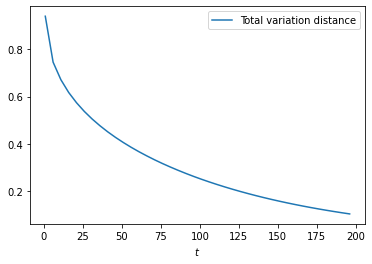

In [54]:
# Microstate with p = 0
plot(microstates[0], ts, num_random_dists, pis[0])

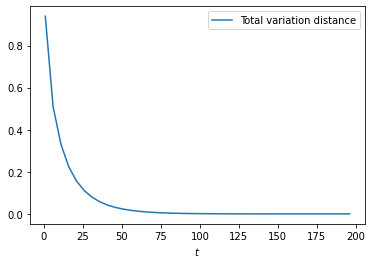

In [55]:
# Microstate with p = 0.1
plot(microstates[1], ts, num_random_dists, pis[1])

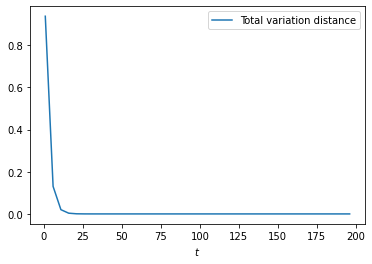

In [56]:
# Microstate with p = 1
plot(microstates[2], ts, num_random_dists, pis[2])

We observe that the regular lattice network ($p = 0$) has the slowest convergence speed while the network where every link was rewired ($p = 1$) exhibits extremly fast convergence. The convergence rate of the network with some rewiring ($p = 0.1$) is considerably faster than in a regular lattice but still sigificantly slower than in the completely randomized network. <br/>
This leads us to the hypothesis that regularity hinders the diffusion of information.